Exercício 2: Utilização dos softwares OCTAVE, SCILAB e MATLAB para visualização de superfícies tridimensionais (meshgrid, mesh, surf) e curvas de níveis (contour) para o problema de otimização do sistema de extração por solvente. Arquivos Aulas_Octave/extrator.m, Aulas_Scilab/extrator.sce e Aulas_Matlab/extrator.m.

a = 130.0
b = 0.5
c = 4000.0
d = 25.0


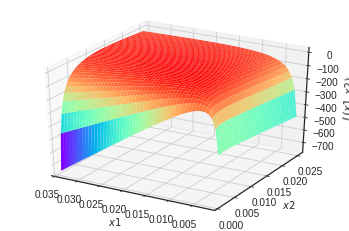

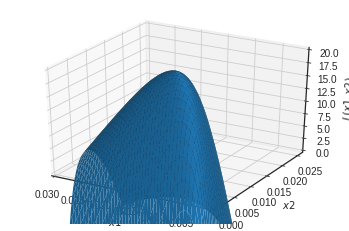

In [118]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

Ps = 0.4 #R$/kg-soluto
Px = 0.01 #R$/kg-solvente
F = 10000 #kg-agua/h
xo = 0.02 #kg-soluto/kg-agua
#s=7e-4   #kg-solvente/kg-agua
s = 0 #kg-solvente/kg-agua
m = 4 #kg-agua/kg-solvente

a = F*((Ps*xo)+((2*Px)/m)-(Px*s))
b = (F*Px*xo)/m
c = F*Ps
d = (F*Px)/m

print("a =", a) #a=130
print("b =", b) #b=0.5
print("c =", c) #c=4000
print("d =", d) #d=25

#Plot surface 3d:

from matplotlib import cm

x1 = np.linspace(0.001, 0.035, 50)
x2 = np.linspace(0.001, 0.025, 50)
X, Y = np.meshgrid(x1, x2)

Z = a - (b/X) - (c*Y) - d*(X/Y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap=cm.rainbow)

ax.set_xlim(0.035,0.001)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

#Por algum motivo o matplotlib seta um intervalo de [0,-700] para o eixo z, 
#então tive que manualmente escolher a faixa de z para [20,0] para poder 
#"enxergar" o máximo do lucro L(x1,x2).

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z);
ax.set_xlim(0.03,0.001)
ax.set_zlim(0,20)
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

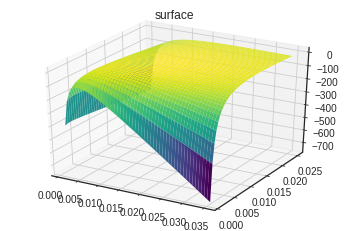

In [112]:
#Apenas tentando obter a região de interesse pelo default de novo, sem sucesso:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [82]:
a - (b/0.015) - (c*0.01) - d*(0.015/0.01)

19.166666666666657

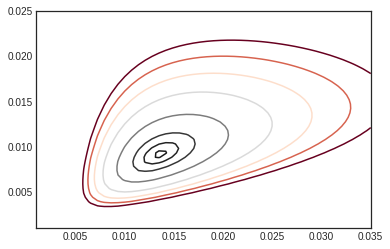

In [113]:
#Plot density - contour:

plt.contour(X, Y, Z, [-5,0,5,10,15,18,19,19.4], cmap='RdGy');

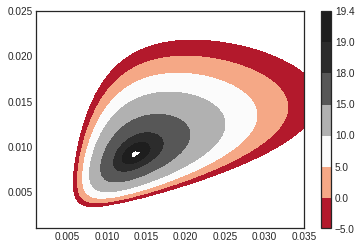

In [114]:
#Plot density - contour:

plt.contourf(X, Y, Z, [-5,0,5,10,15,18,19,19.4], cmap='RdGy')
plt.colorbar();

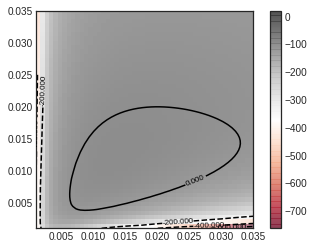

In [117]:
#Plot density - contour:

#Aqui acontece o mesmo problema de antes, ele reconhece por default z = [0,-700];
#se eu setar um intervalo para [x1,x2] = [(0.001, 0.035), (0.001, 0.035)]

contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0.001, 0.035, 0.001, 0.035], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();